## Problem 2: Classification problem
Note: Binary classification as trying to answer a yes/no question like classified emails either spam or not spam is an example of a binary classification problem.


Using the Brain Cancer data set to fit classification models in order to classify whether a given
brain cancer is diagnosed as “Meningioma”, “LG glioma”, “HG glioma”, or “Other”.
Explore Polynomial regression, naive Bayes, and KNN models. Describe your findings. And
using appropriate metrics to tell which is the best model.

A data set consisting of survival times for patients diagnosed with brain cancer.

sex: Factor with levels “Female” and “Male”

diagnosis: Factor with levels “Meningioma”, “LG glioma”, “HG glioma”, and “Other”.

loc: Location factor with levels “Infratentorial” and “Supratentorial”.

ki: Karnofsky index.

gtv: Gross tumor volume, in cubic centimeters.

stereo: Stereotactic method factor with levels “SRS” and “SRT”.

status: Whether the patient is still alive at the end of the study: 0=Yes, 1=No.

time: Survival time, in months

# Importing libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## 1) Load the data

In [58]:
!pip install ISLP
from ISLP import load_data
df = load_data('BrainCancer')
df

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30
...,...,...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,SRT,1,20.69
84,Male,HG glioma,Supratentorial,80,19.81,SRT,1,6.39
85,Male,Meningioma,Supratentorial,90,2.50,SRT,0,32.82
86,Male,Meningioma,Supratentorial,90,2.02,SRS,0,42.07


In [59]:
df.head(0)

,sex,diagnosis,loc,ki,gtv,stereo,status,time


In [60]:
df.shape

(88, 8)

In [61]:
df.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [62]:
df.describe()

,ki,gtv,status,time
count,88.000000,88.000000,88.000000,88.000000
mean,81.022727,8.660795,0.397727,27.457500
std,10.508866,8.657576,0.492233,20.124412
min,40.000000,0.010000,0.000000,0.070000
25%,80.000000,2.500000,0.000000,10.392500
50%,80.000000,6.510000,0.000000,24.030000
75%,90.000000,12.100000,1.000000,41.597500
max,100.000000,34.640000,1.000000,82.560000


## 2) Clean data

Counts the number of occurrences of each unique value in the column.

In [63]:
df['sex'].value_counts()

Female    45
Male      43
Name: sex, dtype: int64

In [64]:
df['diagnosis'].value_counts()

Meningioma    42
HG glioma     22
Other         14
LG glioma      9
Name: diagnosis, dtype: int64

In [65]:
df['loc'].value_counts()

Supratentorial    69
Infratentorial    19
Name: loc, dtype: int64

In [66]:
df['stereo'].value_counts()

SRT    65
SRS    23
Name: stereo, dtype: int64

In [67]:
# Check NaNs Values. It appaear to have NaNs values in row 13. I will drop this row in this case.
df.isna().sum()

sex          0
diagnosis    1
loc          0
ki           0
gtv          0
stereo       0
status       0
time         0
dtype: int64

In [68]:
df[df.isnull().any(axis=1)]

,sex,diagnosis,loc,ki,gtv,stereo,status,time
13,Male,NaN,Supratentorial,90,6.38,SRT,0,50.85


In [69]:
# Drop these rows with Nan values.

df.dropna(subset=['diagnosis'], inplace=True)

# df = df.dropna()
df.isna().sum()

sex          0
diagnosis    0
loc          0
ki           0
gtv          0
stereo       0
status       0
time         0
dtype: int64

In [70]:
df.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


## Feature set

In [71]:
# Check rows and columns after drop one row.
df.shape

(87, 8)

In [72]:
type(df)

pandas.core.frame.DataFrame

### To use Scikit learn, we have to convert  the pandas data frame to a Numpy array.

In [73]:
# Converts these features to numerical values using label encoding 
# to convert the categorical variale into dummy/indicator variables. 

# Note: The array X is a two dimensional array of features, which one row per data point and one column per features.
# Note: The array y is a one dimentional array, which here contains one class label, an integer ranging from 0 to 2, for each of the samples.

X = df[['sex','loc', 'ki', 'gtv', 'stereo', 'status', 'time']].values
X[0:9]

array([['Female', 'Infratentorial', 90, 6.11, 'SRS', 0, 57.64],
       ['Male', 'Supratentorial', 90, 19.35, 'SRT', 1, 8.98],
       ['Female', 'Infratentorial', 70, 7.95, 'SRS', 0, 26.46],
       ['Female', 'Supratentorial', 80, 7.61, 'SRT', 1, 47.8],
       ['Male', 'Supratentorial', 90, 5.06, 'SRT', 1, 6.3],
       ['Female', 'Supratentorial', 80, 4.82, 'SRS', 0, 52.75],
       ['Male', 'Supratentorial', 80, 3.19, 'SRT', 0, 55.8],
       ['Male', 'Supratentorial', 80, 12.37, 'SRT', 0, 42.1],
       ['Female', 'Supratentorial', 70, 12.16, 'SRT', 0, 34.66]],
      dtype=object)

In [74]:
X[:,0]

array(['Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male'], dtype=object)

In [75]:
X[:,1]

array(['Infratentorial', 'Supratentorial', 'Infratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Infratentorial',
       'Infratentorial', 'Supratentorial', 'Supratentorial',
       'Infratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Infratentorial', 'Infratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Infratentorial', 'Infratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Infratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial', 'Infratentorial', 'Supratentorial',
       'Supratentorial', 'Supratentorial', 'Supratentorial',
       'Supratentorial',

In [76]:
X[:,4]

array(['SRS', 'SRT', 'SRS', 'SRT', 'SRT', 'SRS', 'SRT', 'SRT', 'SRT',
       'SRT', 'SRT', 'SRS', 'SRS', 'SRT', 'SRS', 'SRT', 'SRT', 'SRS',
       'SRT', 'SRS', 'SRT', 'SRS', 'SRS', 'SRT', 'SRT', 'SRT', 'SRT',
       'SRT', 'SRS', 'SRS', 'SRS', 'SRT', 'SRS', 'SRT', 'SRT', 'SRT',
       'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRS',
       'SRT', 'SRT', 'SRT', 'SRS', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT',
       'SRS', 'SRS', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT', 'SRT',
       'SRT', 'SRT', 'SRT', 'SRS', 'SRS', 'SRT', 'SRT', 'SRT', 'SRT',
       'SRT', 'SRT', 'SRT', 'SRS', 'SRT', 'SRT', 'SRS', 'SRT', 'SRT',
       'SRT', 'SRT', 'SRT', 'SRT', 'SRS', 'SRT'], dtype=object)

In [77]:
# Convert categorical variables to numerical use LabelEncoder.

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders={}
for column in ['sex', 'diagnosis', 'loc', 'stereo']:
    lebel = LabelEncoder()
    df[column] = lebel.fit_transform(df[column])
    label_encoders[column] = lebel
label_encoders

{'sex': LabelEncoder(),
 'diagnosis': LabelEncoder(),
 'loc': LabelEncoder(),
 'stereo': LabelEncoder()}

In [78]:
X = df[['sex','loc', 'ki', 'gtv', 'stereo', 'status', 'time']].values
X[0:8]

array([[ 0.  ,  0.  , 90.  ,  6.11,  0.  ,  0.  , 57.64],
       [ 1.  ,  1.  , 90.  , 19.35,  1.  ,  1.  ,  8.98],
       [ 0.  ,  0.  , 70.  ,  7.95,  0.  ,  0.  , 26.46],
       [ 0.  ,  1.  , 80.  ,  7.61,  1.  ,  1.  , 47.8 ],
       [ 1.  ,  1.  , 90.  ,  5.06,  1.  ,  1.  ,  6.3 ],
       [ 0.  ,  1.  , 80.  ,  4.82,  0.  ,  0.  , 52.75],
       [ 1.  ,  1.  , 80.  ,  3.19,  1.  ,  0.  , 55.8 ],
       [ 1.  ,  1.  , 80.  , 12.37,  1.  ,  0.  , 42.1 ]])

In [79]:
y = df['diagnosis']

In [80]:
df.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,0,2,0,90,6.11,0,0,57.64
1,1,0,1,90,19.35,1,1,8.98
2,0,2,0,70,7.95,0,0,26.46
3,0,1,1,80,7.61,1,1,47.80
4,1,0,1,90,5.06,1,1,6.30


In [81]:
X.shape

(87, 7)

In [82]:
type(X)

numpy.ndarray

In [83]:
# Number of dimentional array
X.ndim

2

## Normalize Data

Some algorithm in machine learning is sensitive to scale of data, meaning features with higher magnitudes unduly influence the model. To prevent this, normalize(scale data).

In [84]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:,5]

array([-0.82041265,  1.2188988 , -0.82041265,  1.2188988 ,  1.2188988 ,
       -0.82041265, -0.82041265, -0.82041265, -0.82041265, -0.82041265,
        1.2188988 , -0.82041265, -0.82041265, -0.82041265,  1.2188988 ,
        1.2188988 , -0.82041265,  1.2188988 , -0.82041265, -0.82041265,
        1.2188988 , -0.82041265,  1.2188988 ,  1.2188988 ,  1.2188988 ,
        1.2188988 ,  1.2188988 , -0.82041265, -0.82041265,  1.2188988 ,
       -0.82041265,  1.2188988 , -0.82041265, -0.82041265, -0.82041265,
       -0.82041265,  1.2188988 ,  1.2188988 , -0.82041265, -0.82041265,
        1.2188988 , -0.82041265,  1.2188988 , -0.82041265,  1.2188988 ,
       -0.82041265,  1.2188988 ,  1.2188988 , -0.82041265, -0.82041265,
       -0.82041265,  1.2188988 , -0.82041265,  1.2188988 , -0.82041265,
       -0.82041265,  1.2188988 ,  1.2188988 , -0.82041265,  1.2188988 ,
        1.2188988 ,  1.2188988 , -0.82041265, -0.82041265, -0.82041265,
        1.2188988 , -0.82041265, -0.82041265, -0.82041265, -0.82

# 3) Split the dataset


Trainning data or training set : Use to build our machine learning model.

Test Data, test set of hold-out-set: The rest of the data will be use to acccess how well the model works.

Note: We split our dataset into a training set, to build our model, and a test set, to evaluate how well our model will generize to new, previously unseen data.

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train

array([[ 1.03509834, -1.89181061, -0.08787496, -0.97838349, -1.66811531,
        -0.82041265,  0.32462539],
       [ 1.03509834,  0.52859414,  1.82340532,  1.87460524,  0.59947894,
        -0.82041265, -0.3730705 ],
       [-0.96609178, -1.89181061,  0.86776518, -0.24809233, -1.66811531,
        -0.82041265,  0.35417605],
       [ 1.03509834,  0.52859414,  0.86776518, -0.70799088, -1.66811531,
        -0.82041265,  0.86154571],
       [ 1.03509834,  0.52859414,  0.86776518, -0.97145034,  0.59947894,
         1.2188988 , -0.53885467],
       [-0.96609178,  0.52859414,  0.86776518, -0.45839769, -1.66811531,
        -0.82041265,  1.89481681],
       [ 1.03509834,  0.52859414,  1.82340532, -0.71145745,  0.59947894,
        -0.82041265, -0.78677963],
       [ 1.03509834, -1.89181061, -1.04351509, -1.00264949, -1.66811531,
        -0.82041265, -0.17623311],
       [-0.96609178,  0.52859414, -0.08787496, -0.44684245, -1.66811531,
        -0.82041265,  1.28026342],
       [-0.96609178,  0.5285

In [86]:
# Printing the number of samples and features in the training and test dataset.

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('')
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (69, 7)
y_train shape: (69,)

X_test shape: (18, 7)
y_test shape: (18,)


# 4) Building a model in machine learning

# Naive Bayers
It is algorithms that learns tbe property of every features, and which group they belongs to.

In [87]:
# Fitting of Native Bayers Algorithm to the Training Dataset.

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

## Predicting the model

In [88]:
# Making prediction on the testing set

y_pred = gnb.predict(X_test)
y_pred

array([2, 2, 0, 3, 3, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2])

In [89]:
print(gnb.classes_)

[0 1 2 3]


In [90]:
# Check the classes for 'diagnosis' column
diagnosis_classes = label_encoders['diagnosis'].classes_
print("Mapping for 'diagnosis' column:")
for idx, label in enumerate(diagnosis_classes):
    print(f"{idx} -> {label}")


Mapping for 'diagnosis' column:
0 -> HG glioma
1 -> LG glioma
2 -> Meningioma
3 -> Other


In [91]:
# comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics


print('Gaussian Naive Bayers model accuray (in %):', metrics.accuracy_score(y_test,y_pred))

print("Naive Bayes Classification Report:")
print('')
print(classification_report(y_test, y_pred))


Gaussian Naive Bayers model accuray (in %): 0.7222222222222222
Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1
           2       0.80      0.80      0.80        10
           3       0.00      0.00      0.00         1

    accuracy                           0.72        18
   macro avg       0.41      0.41      0.41        18
weighted avg       0.72      0.72      0.72        18



C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  The evaluation 

Given: 
class 0 : HG glioma
class 1: LG glioma
class 2 : Meningioma
cass 3 : Other

1. The model accuracy: The model's accuracy is 72.22%, mean it correctly predicts the class for 72.22% of the test cases, but it's not specific to any of the classes. This mean the model is accurate 0f 72.22% of the test instances, but it does not neccessarily fullfill the requirement for classifying each type of cancer accurately.

2. Classification report: The model perfomrs well for classes 0 and 2 with the most_frequent model but struggles with class 1 and 3 as there are no predictions of the class (whicha makes the denominator in f-score zero). 

    Class 0: 'HG glioma' Good percision, recall and F1 score (all are 0.83).
    
    class 1 'LG glioma' and 3 'Other': Percision, recall and F1 score are 0, means the model couldn't correctly predict any instance of these clases in the test set. It means the model might often miss cases of “LG glioma” and “Other” or misclassify them.

    class 2 'Meningioma':show good decent result; percise, recall and F1 score are 0.80.
    
    So, the macro avg quite low, percision, recall and F1 score is 0.41, affected by 0 scores in class 1 and 3.
    The last row in the classification report shows a weighted (by the number of samples in the class) avearge of number in each class.
    
In conclusion, 
In clusion, the model appears to have a reasonable overall accuracy, it falls short in classifying certain types of brain cancer, in 'LG glioma' and 'Other'.

In [92]:
# Calculate and prints the number of mislables points out of the total number of test points.
# The output mean that  out of the 18 data points in the test set, the model miss classified 5 of them.

print('Number of mislabeled points out of a total %d points : %d'
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 18 points : 5


In [93]:
# Use cross-validation to assess the performance of the Gaussian Naive Bayes model.
# In order to get a better estimate of model performance by training, testing on differnt subsets of data.
# The results is the accurate scores of the model for each of 5 cross-validation folds.

from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.28571429, 0.28571429, 0.57142857, 0.14285714, 0.53846154])

<Axes: >

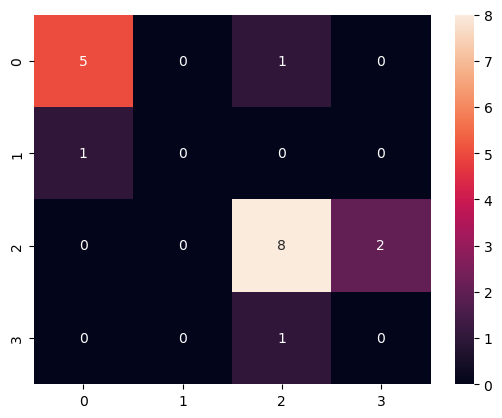

In [94]:
# A confusion matrix helps to understand the quality of the model. It describes the production of a classification model on a set of test data for which you know the true values. Every row in a confusion matrix portrays an actual class, and every column portrays the predicted class.

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

The heatmap of confusion matrix, evaluates the performance of the model.We can see that the matrix shows the true class (rows) versus the predicted class (columns), Diagonal values (e.g., top-left "5" or middle "8") show correct predictions, Off-diagonal values (e.g., top-right "1") show incorrect predictions.

# Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures

# The default 'include_bias=True' add a feaures that constantly 1
# include polynomials up to x ** 10

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train_poly)
print('')
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_poly.shape: {}'.format(X_train_poly.shape))

[[ 1.          1.03509834 -1.89181061 ...  0.67307692 -0.26632678
   0.10538165]
 [ 1.          1.03509834  0.52859414 ...  0.67307692  0.30607176
   0.1391816 ]
 [ 1.         -0.96609178 -1.89181061 ...  0.67307692 -0.29057051
   0.12544067]
 ...
 [ 1.          1.03509834  0.52859414 ...  0.67307692  0.29004625
   0.12498842]
 [ 1.         -0.96609178  0.52859414 ...  1.48571429 -1.2294544
   1.01739488]
 [ 1.          1.03509834  0.52859414 ...  1.48571429 -1.06339953
   0.76112788]]

X_train.shape: (69, 7)
X_train_poly.shape: (69, 36)


Note: The data first had 7 features, then expanded into 36 interaction features.Which mean these new features represent all possible interactions beween two different original features, as well as the square of each original feature; degree=2 here means that we looks at all features that are the product of up to two original features.The extract correspondence between input and output features can be found using the get feature_name_out.

In [96]:
feature_names = poly.get_feature_names_out(input_features=None)

print('Polynomial feature names:\n{}'.format(feature_names))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3'
 'x0 x4' 'x0 x5' 'x0 x6' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6'
 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6'
 'x4^2' 'x4 x5' 'x4 x6' 'x5^2' 'x5 x6' 'x6^2']


In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_poly, y_train)
y_pred_poly = logreg.predict(X_test_poly)

# This use for regresion problem where oitput in continous, in this case we are trying to classify brain cancer diagnosis types.
# Which is categorical output using linear is not make sense.
# Predicting a categorical outcome (i.e., the type of brain cancer), so we should use a classification algorithm, like LogisticRegression, not LinearRegression.
# Poliminal suppose to shows the highest.

In [98]:
    # Prediction of Polynomial Regression

    print(classification_report(y_test, y_pred_poly))
    print("Accuracy:", accuracy_score(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      1.00      0.67         1
           2       0.71      0.50      0.59        10
           3       0.00      0.00      0.00         1

    accuracy                           0.61        18
   macro avg       0.48      0.58      0.51        18
weighted avg       0.66      0.61      0.62        18

Accuracy: 0.6111111111111112


###  The evaluation 

Class 0: 'HG glioma' Good percision of 0.71 which means that when the model predicts 'HG glioma', it's correct about 71% of the time. Recall 0.83, suggests the model is good at capturing the majority of 'HG glioma' instances, and F1 score 0.77, this mean that persicion and recll give the balance view of two in a single metric. 
    
class 1 'LG glioma' percision of 0.50 mean, it coreect 50% of the tiem. Recall 1.00, indicate that the model corectly identified all "LG glioma" or mean that not too many instances and F1 score 0.67, a balance between percision and recall, given the lower perdiction on percision; the model might be over perdicting.

class 2 'Meningioma':  percision of 0.71, mean the perdiction is corect 71% of the time, recall 0.50, the model identified only 50% of the actual 'Meningioma'data and F1 score 0.59.

class 3 'Other': Percision, recall and F1 score are 0, means the model couldn't correctly predict any instance of these class in the test set.

In conclusion, the model's overall accuracy is 61.11%, considered moderate. The model perform well for class 0 and class 1 but struggles with class 3.

# K nearest neighbor (KNN)

## Import libaries

In [99]:
from sklearn.neighbors import KNeighborsClassifier

## Training
Start algorithm with K=4

In [100]:
k=4
#Train model and Predict
knn_neighbor = KNeighborsClassifier(n_neighbors = k)
knn_neighbor

KNeighborsClassifier(n_neighbors=4)

In [101]:
# Then we build the model by calling the fit model, passing the training data(X_train) and training outputs(y_train) as parameters.
knn_neighbor.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

## Predicting
We can now make predictions using this model on new data for which we might not know the correct labels.


In [102]:
y_test[0:10]

77    2
0     2
27    0
23    2
12    2
68    2
10    1
19    2
4     0
69    2
Name: diagnosis, dtype: int32

In [103]:
X_test

array([[-0.96609178,  0.52859414,  0.86776518, -0.1648946 ,  0.59947894,
        -0.82041265,  1.09494578],
       [-0.96609178, -1.89181061,  0.86776518, -0.29777986, -1.66811531,
        -0.82041265,  1.52518323],
       [ 1.03509834,  0.52859414, -1.04351509,  2.8891553 ,  0.59947894,
         1.2188988 , -1.35825918],
       [-0.96609178, -1.89181061,  1.82340532, -0.75767841, -1.66811531,
         1.2188988 ,  1.1936149 ],
       [-0.96609178, -1.89181061,  0.86776518, -0.93100701, -1.66811531,
        -0.82041265,  0.29006616],
       [-0.96609178,  0.52859414, -0.08787496, -0.20302689, -1.66811531,
        -0.82041265, -0.8558981 ],
       [ 1.03509834,  0.52859414, -0.08787496, -0.98762768,  0.59947894,
         1.2188988 ,  0.43781942],
       [-0.96609178,  0.52859414,  0.86776518, -0.71492402,  0.59947894,
        -0.82041265,  0.14882406],
       [ 1.03509834,  0.52859414,  0.86776518, -0.41910988,  0.59947894,
         1.2188988 , -1.04622433],
       [-0.96609178,  0.5285

In [104]:
yhat = knn_neighbor.predict(X_test)
print('Test set predictions:\n {}'.format(yhat))

Test set predictions:
 [2 2 0 2 2 1 0 2 0 2 1 0 0 2 0 2 2 2]


## Accuracy evaluation
We can measure how well the model works by computing the accuracy.

In [105]:
print('Test set score: {:.2f}'.format(np.mean(yhat == y_test)))

Test set score: 0.72


In [106]:
# We can use the score method of the knn object, which will compute the test set accurate for us.
print('Test set score: {:.2f}'.format(knn_neighbor.score(X_test, y_test)))

Test set score: 0.72


In [107]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn_neighbor.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))
print('')
print(classification_report(y_test, yhat))
print('')
print(confusion_matrix(y_test, yhat))

print('')
print("\nKNN:")
# print(classification_report(y_test, yhat))
print("Accuracy:", accuracy_score(y_test, yhat))

Train set Accuracy:  0.6376811594202898
Test set Accuracy:  0.7222222222222222

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1
           2       0.80      0.80      0.80        10
           3       0.00      0.00      0.00         1

    accuracy                           0.72        18
   macro avg       0.41      0.41      0.41        18
weighted avg       0.72      0.72      0.72        18


[[5 0 1 0]
 [1 0 0 0]
 [0 2 8 0]
 [0 0 1 0]]


KNN:
Accuracy: 0.7222222222222222


C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bruker1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluation:

Class : The model could not predicting instances of class class 3 'Other' and class 1 'LG glioma'.It has a precision, recall, and F1-score of 0 for these classes, indicating it either doesn't predict them at all or all of its predictions are wrong.

In the concern of overfitting: The training set accuracy 63.77% is lower than a test set accuracy 72.22 %. While a bit unusual to see higher test accuracy than training accuracy, the close values might suggest that the model is not overfitting significantly or can said that we can expect our model to be correct 72% of the brain cancer prediction.

The confusion matrix : shows miss clasifications, between class 2 and 3 and 1 and 0.

In clusion, the model appear to work well for certain classes but struggles with class 1 and 0. It might not be the best fit for this dataset if the goal is to have balanced performance across all classes.

## Working on Others K


In [108]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Train model and predict
    knn_neighbor = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_neighbor.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.55555556, 0.66666667, 0.66666667, 0.72222222, 0.66666667,
       0.72222222, 0.72222222, 0.66666667, 0.77777778])

### Plot the model accuracy for a differnt number of neighbors.

It can be seen from the plot that, the best choice for the number of neighbors (K) is 9, yielding the highest accuracy of approximately 77.78%. The graph and analysis show that as K increases, the accuracy peaks at K=9

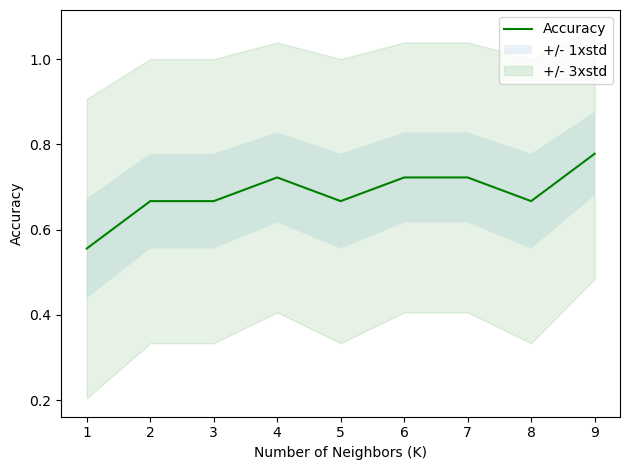

In [109]:
from matplotlib import pyplot as plt
plt.plot(range(1,Ks),mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [110]:
print('The best accuracy was with', mean_acc.max(), 'with k =', mean_acc.argmax()+1)

The best accuracy was with 0.7777777777777778 with k = 9


# Conclusion:

Both Gaussian Naive Bayes and KNN have the highest accuracy at 72.22%, followed by Polynomial Regression at 61.11% But those two struggled with the "LG glioma" and "Other" categories, having 0 scores. While, the "Meningioma" and "HG glioma" categories had decent scores, especially in Gaussian Naive Bayes and KNN. 

In this case, Both Gaussian Naive Bayes and KNN models considerd in term of accuracy and metrics for individual class, hence shows as the best fit base on the provided data. Becuase both models have the highest accuracy, with balance percision and recall out of four categories. 

However, Gaussian Naive Baye failed to classify "LG glioma" and "Other"  and polynomial fails to classify 'Other' class, this can indicates the issue with dataset's distribution or low potential of model to genelize across all classes.